# K-Nearest Neighbors (KNN) Regression Model

In this section, we trained and evaluated a K-Nearest Neighbors (KNN) Regression model for cylinder surface area prediction. Here's a quick overview of the steps:

- **Data Loading and Splitting**: We loaded the training and testing data, splitting them into feature sets (X_train and X_test) and target variables (y_train and y_test).

- **Model Creation**: We created a pipeline that includes Standard Scaling and a KNN Regressor with 4 neighbors.

- **Model Training**: The KNN model was trained on the training data.

- **Model Evaluation**: We predicted surface areas on the test data and evaluated the model using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2) score.

- **Model Serialization**: The trained KNN model was saved using joblib.


In [7]:
#libraries
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:

#loading train and test data
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')


In [9]:
#splitting the data into train and test
def split_data(train, test):
    X_train = train[['radius', 'height']]
    y_train = train['surface_area']
    
    X_test = test[['radius', 'height']]
    y_test = test['surface_area']
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(train, test)

In [10]:
#preprocessing
preprocessor = StandardScaler()

# create pipeline 
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=4))
])

# Train the KNN model on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the KNN model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'KNN Regression MSE: {mse}')
print(f'KNN Regression MAE: {mae}')
print(f'KNN Regression R2: {r2}')


KNN Regression MSE: 30014.48981151137
KNN Regression MAE: 124.02651848843624
KNN Regression R2: 0.9999652644810114


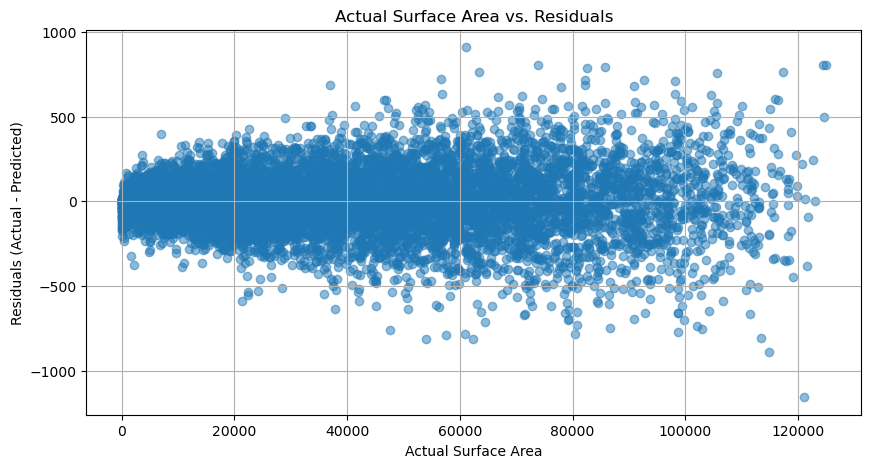

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, residuals, alpha=0.5)
plt.title("Actual Surface Area vs. Residuals")
plt.xlabel("Actual Surface Area")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()


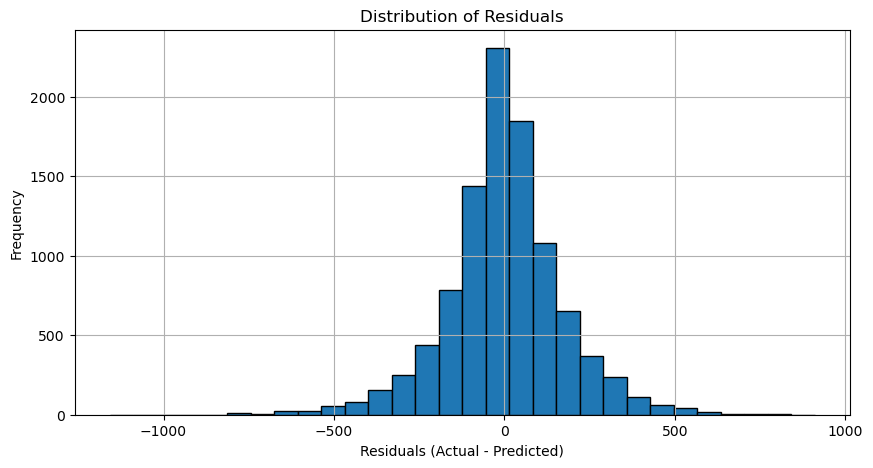

In [13]:

# Residuals Histogram
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [11]:
import joblib
joblib.dump(pipeline, 'knn_model.joblib')

['knn_model.joblib']